Number of rows: 9551
Number of columns: 21
Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Missing values after handling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       

<ipython-input-4-781e43d0bf4a>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_variable, palette='viridis')


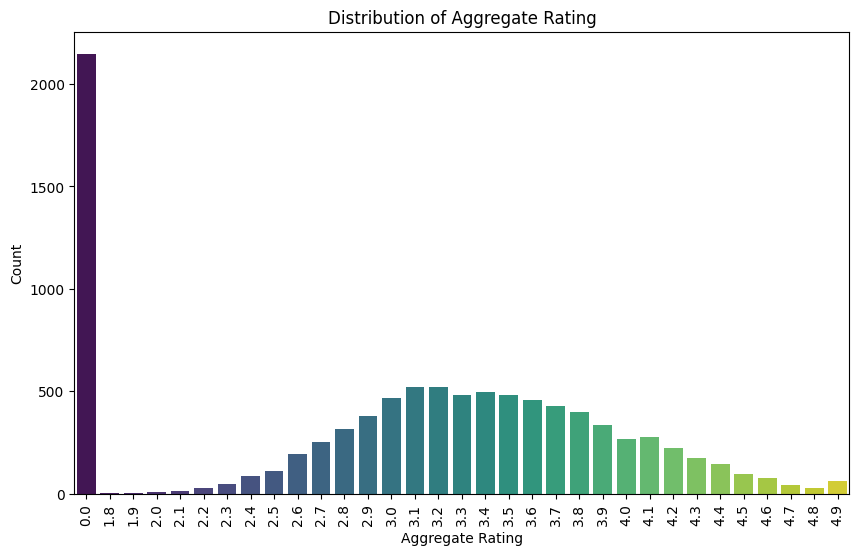

Class distribution of Aggregate rating:
Aggregate rating
0.0    0.224898
3.2    0.054654
3.1    0.054340
3.4    0.052141
3.3    0.050571
3.5    0.050257
3.0    0.049000
3.6    0.047953
3.7    0.044707
3.8    0.041880
2.9    0.039891
3.9    0.035075
2.8    0.032981
4.1    0.028688
4.0    0.027850
2.7    0.026175
4.2    0.023139
2.6    0.019998
4.3    0.018218
4.4    0.015077
2.5    0.011517
4.5    0.009947
2.4    0.009109
4.6    0.008167
4.9    0.006387
2.3    0.004921
4.7    0.004397
2.2    0.002827
4.8    0.002618
2.1    0.001571
2.0    0.000733
1.9    0.000209
1.8    0.000105
Name: proportion, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the dataset
df = pd.read_csv('/Dataset .csv')

# 1. Explore the dataset and identify the number of rows and columns
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

# 2. Check for missing values in each column
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Handling missing values (example: filling with mean for numerical columns and mode for categorical columns)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print('Missing values after handling:')
print(missing_values_after)

# 3. Perform data type conversion if necessary (example: converting object types to category if needed)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

# 4. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances
target_variable = 'Aggregate rating'

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=target_variable, palette='viridis')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Check for class imbalance
class_distribution = df[target_variable].value_counts(normalize=True)
print('Class distribution of Aggregate rating:')
print(class_distribution)




Basic Statistical Measures for Numerical Columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000 

<ipython-input-3-a8bce5b7638f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette='viridis')


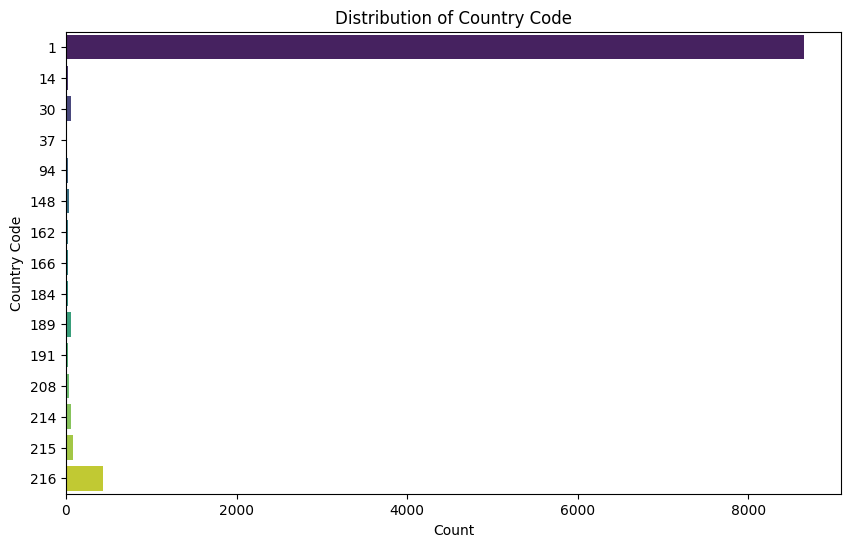


Distribution of City:
City
New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Dicky Beach       1
Lorn              1
Quezon City       1
Lincoln           1
Lakeview          1
Name: count, Length: 141, dtype: int64


<ipython-input-3-a8bce5b7638f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette='viridis')


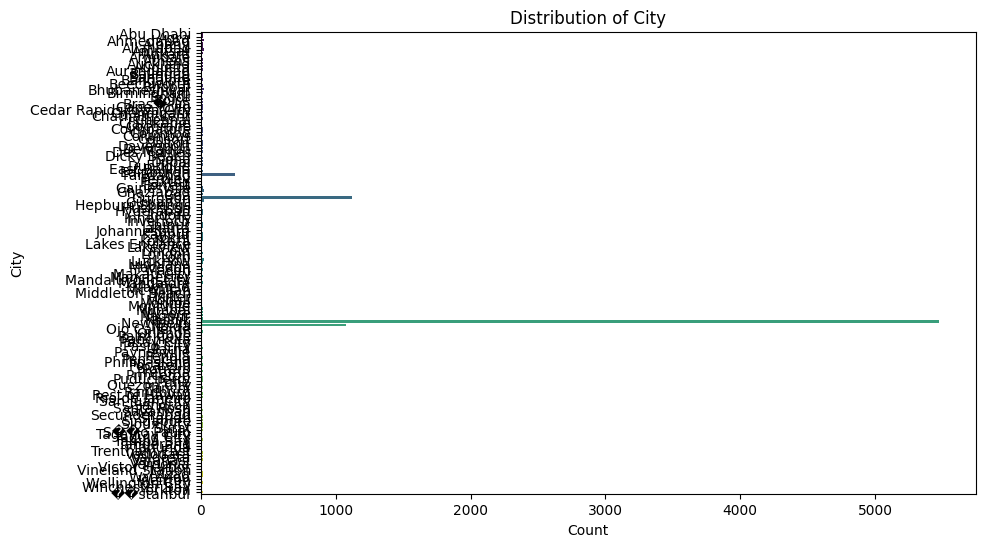


Distribution of Cuisines:
Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Continental, Italian, North Indian, Lebanese, Thai         1
Continental, Italian, North Indian, Lebanese               1
Continental, Italian, North Indian, Chinese, Lebanese      1
Continental, Italian, North Indian, Chinese                1
World Cuisine, Patisserie, Cafe                            1
Name: count, Length: 1825, dtype: int64


<ipython-input-3-a8bce5b7638f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette='viridis')


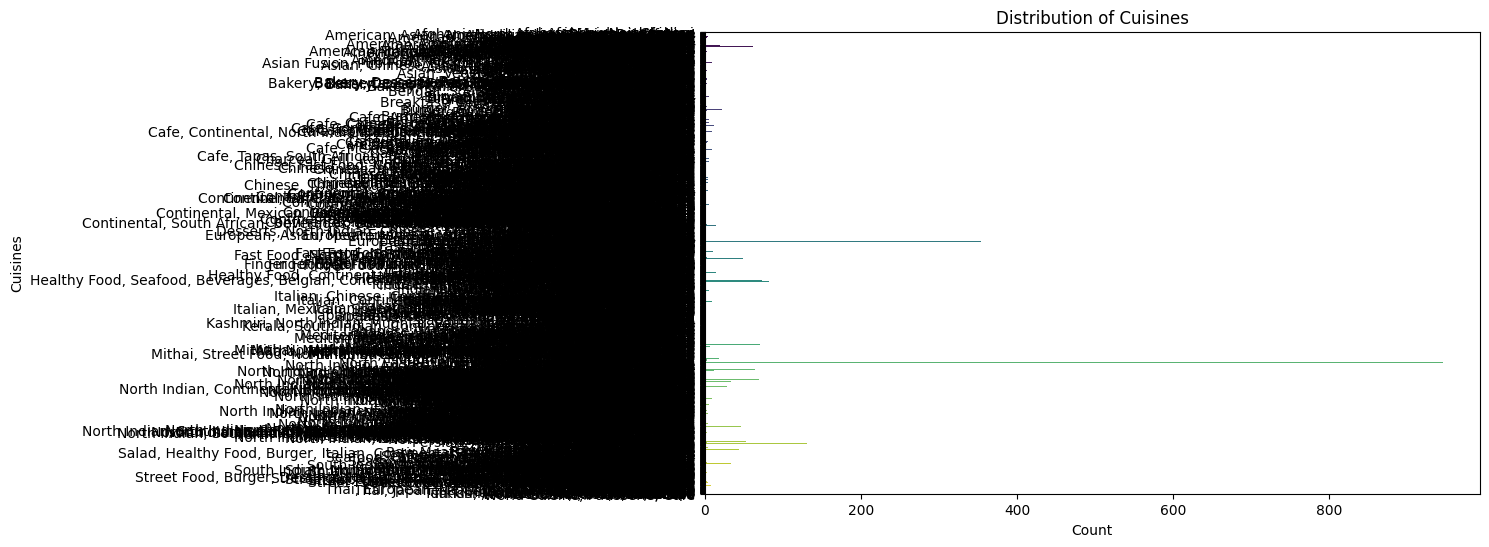


Top Cuisines with the Highest Number of Restaurants:
Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Top Cities with the Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Amritsar          21
Ahmedabad         21
Guwahati          21
Name: count, dtype: int64


<ipython-input-3-a8bce5b7638f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index[:10], x=top_cuisines.values[:10], palette='viridis')


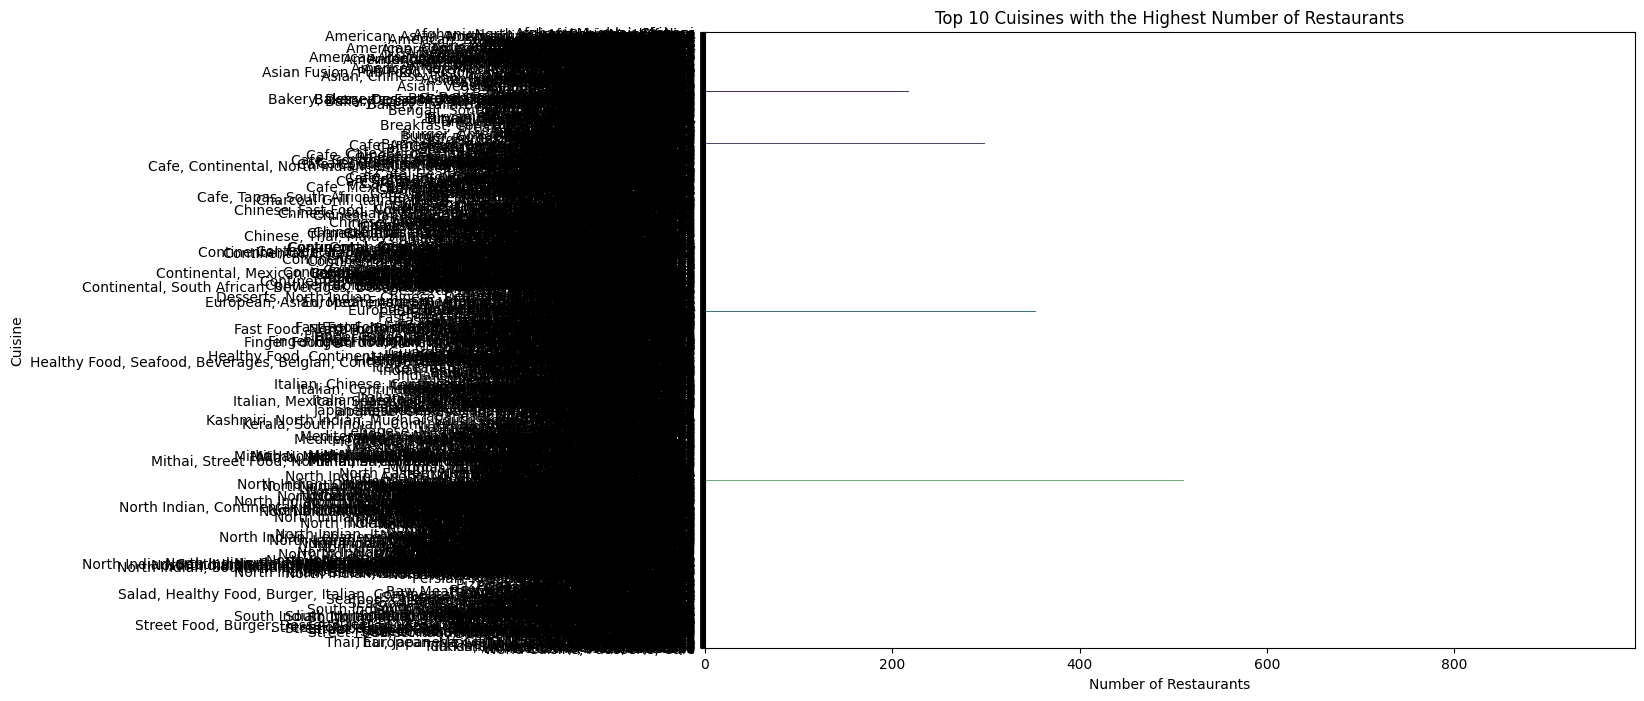

<ipython-input-3-a8bce5b7638f>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index[:10], x=top_cities.values[:10], palette='viridis')


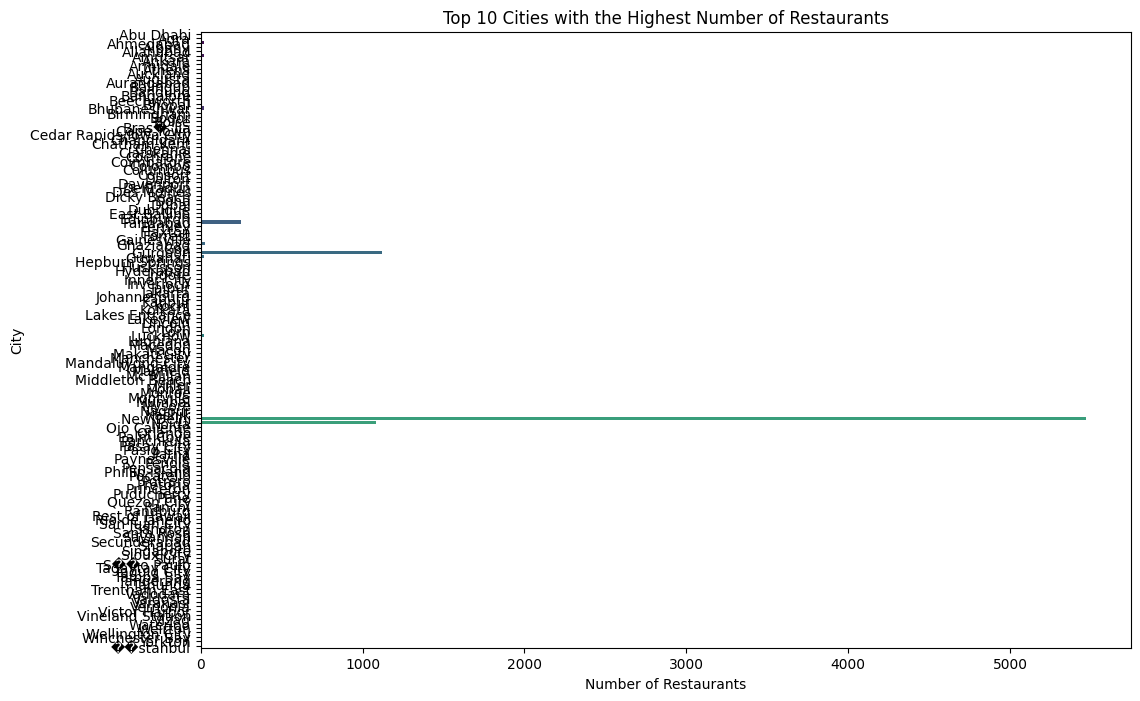

In [3]:
# Calculate basic statistical measures for numerical columns
print('Basic Statistical Measures for Numerical Columns:')
print(df.describe())

# Explore the distribution of categorical variables
categorical_columns = ['Country Code', 'City', 'Cuisines']

for column in categorical_columns:
    print(f'\nDistribution of {column}:')
    print(df[column].value_counts())

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

# Identify the top cuisines and cities with the highest number of restaurants
# Count the number of restaurants for each cuisine
top_cuisines = df['Cuisines'].value_counts()
print('\nTop Cuisines with the Highest Number of Restaurants:')
print(top_cuisines.head(10))  # Adjust the number as needed

# Count the number of restaurants for each city
top_cities = df['City'].value_counts()
print('\nTop Cities with the Highest Number of Restaurants:')
print(top_cities.head(10))  # Adjust the number as needed

# Plot the top cuisines
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cuisines.index[:10], x=top_cuisines.values[:10], palette='viridis')
plt.title('Top 10 Cuisines with the Highest Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

# Plot the top cities
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities.index[:10], x=top_cities.values[:10], palette='viridis')
plt.title('Top 10 Cities with the Highest Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

<ipython-input-5-994401c622b0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='City', palette='viridis')


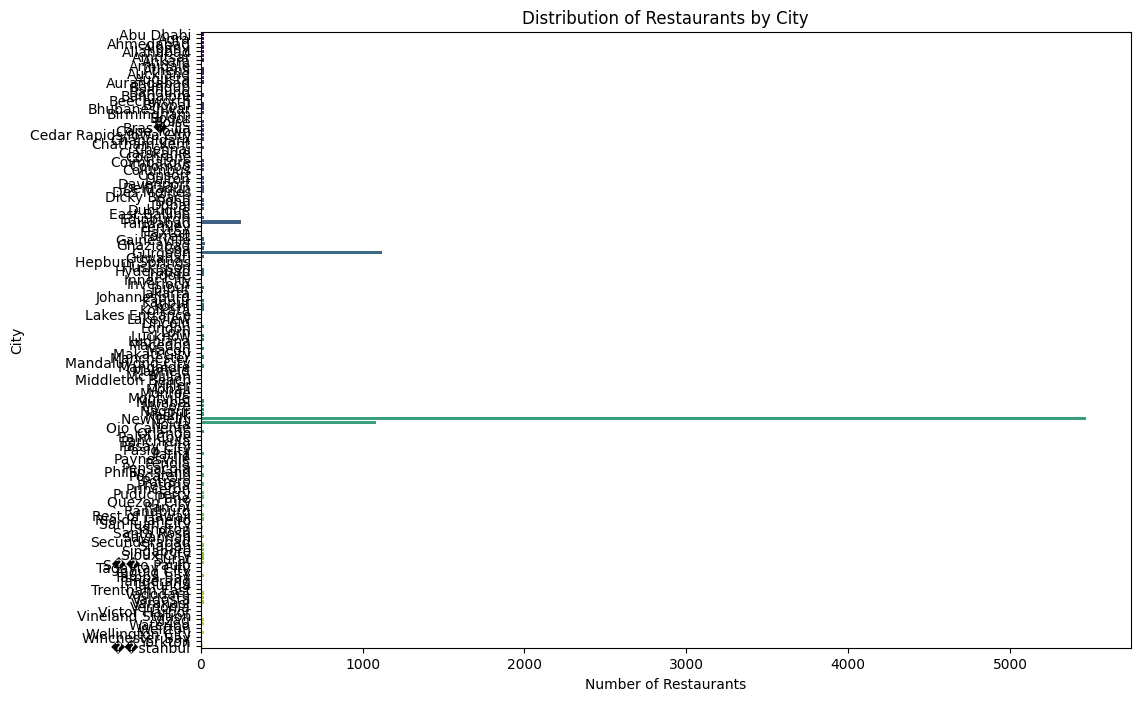

<ipython-input-5-994401c622b0>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Country Code', palette='viridis')


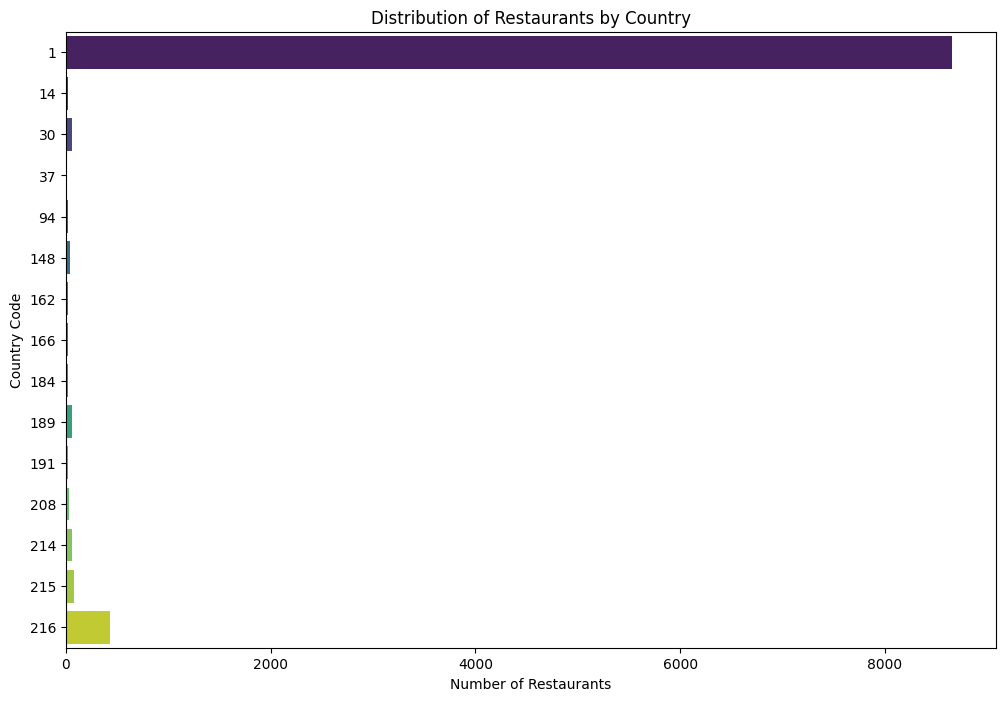

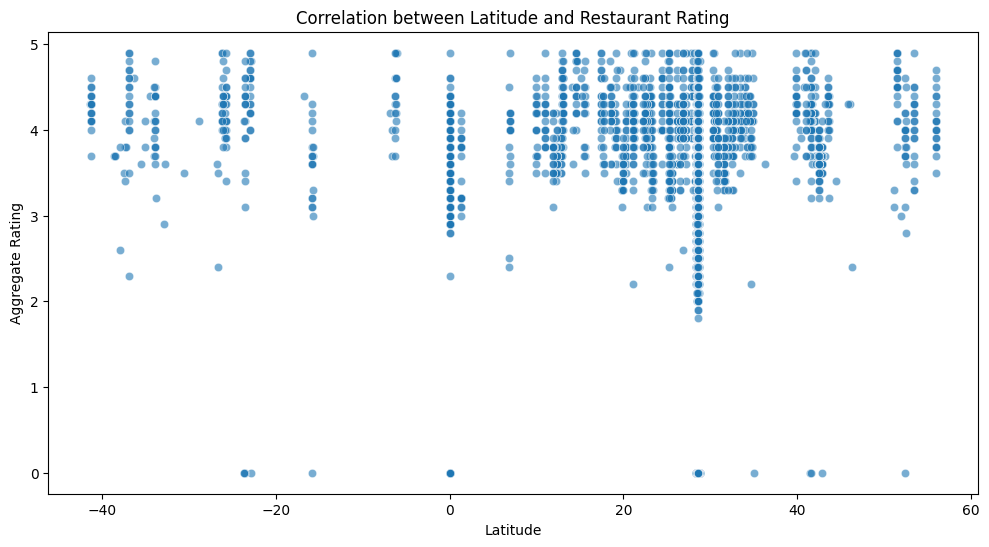

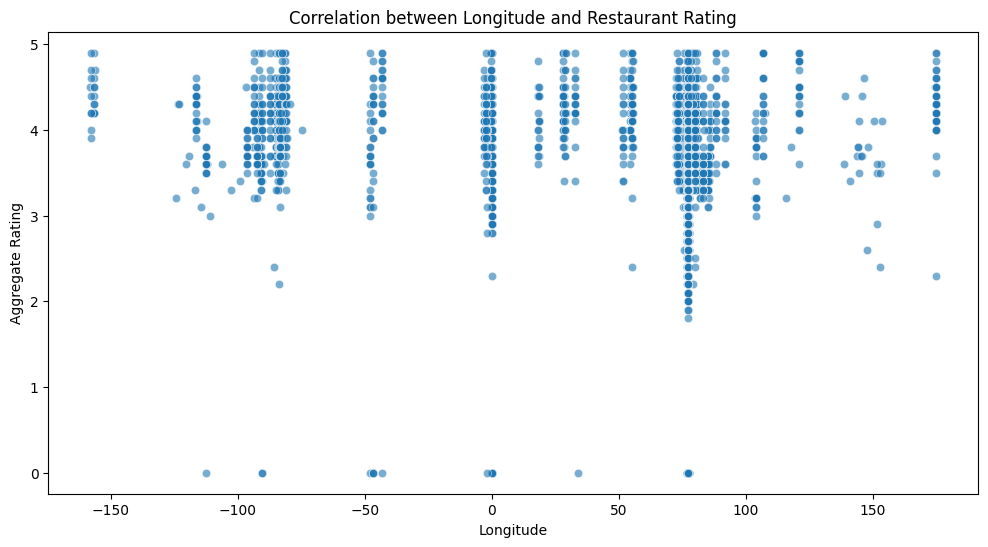

Correlation between Latitude and Rating: 0.00
Correlation between Longitude and Rating: -0.12


In [5]:
# Ensure 'Latitude', 'Longitude', and 'Aggregate rating' are in the dataset
if 'Latitude' not in df.columns or 'Longitude' not in df.columns or 'Aggregate rating' not in df.columns:
    raise ValueError("The dataset must contain 'Latitude', 'Longitude', and 'Aggregate rating' columns.")

# 1. Visualize the locations of restaurants on a map using latitude and longitude information
def plot_restaurant_map(dataframe):
    # Create a base map
    restaurant_map = folium.Map(location=[dataframe['Latitude'].mean(), dataframe['Longitude'].mean()], zoom_start=12)

    # Add restaurant locations to the map
    for _, row in dataframe.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Rating: {row['Aggregate rating']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(restaurant_map)

    # Save map to HTML file
    restaurant_map.save('restaurant_map.html')

plot_restaurant_map(df)

# 2. Analyze the distribution of restaurants across different cities or countries
# Distribution by City
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='City', palette='viridis')
plt.title('Distribution of Restaurants by City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

# Distribution by Country
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Country Code', palette='viridis')
plt.title('Distribution of Restaurants by Country')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country Code')
plt.show()

# 3. Determine if there is any correlation between the restaurant's location and its rating
# Scatter plot for Latitude vs Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Latitude', y='Aggregate rating', alpha=0.6)
plt.title('Correlation between Latitude and Restaurant Rating')
plt.xlabel('Latitude')
plt.ylabel('Aggregate Rating')
plt.show()

# Scatter plot for Longitude vs Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Longitude', y='Aggregate rating', alpha=0.6)
plt.title('Correlation between Longitude and Restaurant Rating')
plt.xlabel('Longitude')
plt.ylabel('Aggregate Rating')
plt.show()

# Optionally, you can also calculate the correlation coefficient
latitude_rating_corr = df[['Latitude', 'Aggregate rating']].corr().iloc[0, 1]
longitude_rating_corr = df[['Longitude', 'Aggregate rating']].corr().iloc[0, 1]

print(f'Correlation between Latitude and Rating: {latitude_rating_corr:.2f}')
print(f'Correlation between Longitude and Rating: {longitude_rating_corr:.2f}')